<a href="https://colab.research.google.com/github/dinsor17/KKU_Data_mining/blob/master/Pandas_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First, we have to say which packages we are going to use by <font color=green>import</font> them. 

In [74]:
import pandas

## Connect with Google drive

In [75]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/DWDM_material'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Create _path_ variables to store where is the data files 

In [76]:
import os

In [77]:
search_click = os.path.join(path,'search_click.csv')
w_restaurant = os.path.join(path,'w_restaurant.csv')

##Then use pandas to load the data into the environment

In [78]:
w_restaurant_df = pandas.read_csv(w_restaurant)
w_restaurant_df.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


In [79]:
search_click_df = pandas.read_csv(search_click)

In [80]:
search_click_df.head()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True


##To chack if the dimension of loaded data is correct as described in the description 

In [81]:
search_click_df.shape

(1048575, 6)

In [82]:
w_restaurant_df.shape

(246847, 32)

##It seem everything is ok, let,s have fun with data

##0.Point to data in the table

### normal indexing

In [83]:
search_click_df['search_id']

0          5c004472-5ecc-4159-9698-9f329b8e26e1
1          5f34eca0-c04e-4c10-b600-54aa447dbd8e
2          8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3          1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4          6bc75e0d-fc65-471e-9926-ff6be6708639
                           ...                 
1048570    99aab616-6fc5-4fbf-994b-4aebee7bb360
1048571    d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a
1048572    4c1de7fe-300e-41aa-9d01-914344fc3753
1048573    2ec0ddec-e450-4b98-9779-42b77aa7eda5
1048574    5741d9cf-b9f1-441d-aa83-d2b0179bf874
Name: search_id, Length: 1048575, dtype: object

In [84]:
search_click_df['search_id'][0] #ง่ายๆ

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [85]:
w_restaurant_df[['name','city_name','weighted_average_rating']]

,name,city_name,weighted_average_rating
0,นครินทร์ทันตกรรม,Samut Songkhram,5.000000
1,Corner House,Bangkok Metropolitan Region,2.000000
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,4.000000
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,0.000000
4,Buono Caffe,Bangkok Metropolitan Region,3.738462
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,3.663522
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,0.000000
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,4.000000
246845,Mom Made,Nakhon Si Thammarat,5.000000


##.iloc

In [86]:
search_click_df.iloc[0,1] #แถว,หลัก 

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [87]:
search_click_df.iloc[:10,:2] 

,click_timestamp,search_id
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639
5,48:16.7,92ea02ba-2c89-4efd-973c-e23526c531de
6,39:18.4,79d61918-fb3e-4181-99b6-7a7abddfcdb1
7,33:39.0,7f8b2b57-dea1-4fe1-84c8-5a7d63750e47
8,07:48.3,3d9217bb-3eae-42b5-8cf3-a756efae2cfa
9,41:25.4,a2cb0d41-6e1f-4169-9140-cb671fbb41dc


##Missing Values

In [88]:
search_click_df.isnull()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1048570,False,False,False,False,False,False
1048571,False,False,False,False,False,False
1048572,False,False,False,False,False,False
1048573,False,False,False,False,False,False


In [89]:
search_click_df.isnull().any() #anyคือยุบรวมความจริงในแต่ละคอลัม

click_timestamp     False
search_id            True
business_id          True
display_position    False
time_diff_nanos     False
ads                 False
dtype: bool

In [90]:
search_click_df.isnull().any().any() #ถ้าanyanyแล้วผลออกมาเป้นtrueแสดงว่าตารางมีmissing อยู่

True

##Handling missing values 1

In [91]:
#คำสั่งลบmissing
search_click_df_nm = search_click_df.dropna()

In [92]:
search_click_df_nm.isnull().any().any()

False

In [93]:
print(search_click_df.shape) #เช็คดูข้อมูลว่ามีกี่แถวกี่หลัก
print(search_click_df_nm.shape)

(1048575, 6)
(1048206, 6)


## Excercise 1 ตรวจสอบว่า การลบข้อมูล missing ออก จากตาราง w_restaurant จะทำให้ข้อมูลลดลงกี่ %

In [94]:
size_before_drop = w_restaurant_df.shape[0]  
size_after_drop = w_restaurant_df.dropna().shape[0]

print(f'size before drop = {size_before_drop} size after drop = {size_after_drop} \\
      \nwhich is {100*((size_before_drop-size_after_drop)/size_before_drop)}')

size before drop = 246847 size after drop = 4 \      
which is 99.99837956304918


##Method 1.5

In [95]:
w_restaurant_df.isnull().any() 

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains            True
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

In [96]:
w_restaurant_df.dropna(subset=['id','name','price_range']).shape

(180972, 32)

##Method 2 (replace with reasonable value)

we are replacing missing value in the number of chains with 0

แทนค่า missing value ลงใน number of chain

In [97]:
#วิธีที่2 วิธีที่ฉลาดขึ้นมาอีกนิด  โดยที่ไม่ต้องลบทิ้งขวาง คือเติมค่าที่เหมาะสมลงไป
#เนาคือไม่มีอะไรเลย อิสเนาคือดูช่องว่างว่ามันมีอะไร
w_restaurant_df[['numder_of_chains']] = w_restaurant_df[['number_of_chains']].fillna(0) #เติมค่าที่เหมาะสม ถ้าไม่รู้ก็ใส่อันโน่น 

In [98]:
w_restaurant_df.isnull().any() 

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains            True
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

##Method 2.1(replace with reasonable value)

##Method 3 

In [99]:
w_restaurant_df[['name','city_name','avg_price']] #NaN=ช่องว่าง ย่อมากจาก

,name,city_name,avg_price
0,นครินทร์ทันตกรรม,Samut Songkhram,NaN
1,Corner House,Bangkok Metropolitan Region,NaN
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,NaN
246845,Mom Made,Nakhon Si Thammarat,NaN


In [100]:
new_table = w_restaurant_df[['name','city_name','avg_price']]
new_table

,name,city_name,avg_price
0,นครินทร์ทันตกรรม,Samut Songkhram,NaN
1,Corner House,Bangkok Metropolitan Region,NaN
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,NaN
246845,Mom Made,Nakhon Si Thammarat,NaN


##[PD] select data 

In [101]:
#สมมติเราอยากเรียกร้านที่กรุงเทพ
selected_list = new_table['city_name']=='Bangkok Metropolitan Region'
selected_list

0         False
1          True
2         False
3          True
4          True
          ...  
246842     True
246843     True
246844     True
246845    False
246846    False
Name: city_name, Length: 246847, dtype: bool

In [102]:
new_table[selected_list].head()

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN


In [103]:
selected_list = new_table['city_name']=='Khon Kaen'
selected_list

0         False
1         False
2         False
3         False
4         False
          ...  
246842    False
246843    False
246844    False
246845    False
246846    False
Name: city_name, Length: 246847, dtype: bool

In [104]:
new_table[selected_list].head()

,name,city_name,avg_price
81,WISH CLINIC,Khon Kaen,NaN
317,Pomodoro,Khon Kaen,NaN
390,ครัวอรวรรณ,Khon Kaen,NaN
452,วาสนาเคียมห้วย,Khon Kaen,NaN
514,ส้มตำศิริพร,Khon Kaen,NaN


## Ex 9 หาราคาเฉลี่ยร้านในจังหวัดกรุงเทพ




In [105]:
new_table[new_table['city_name']=='Bangkok Metropolitan Region'].dropna()['avg_price'].mean()

392.5854715094968

1.เลือกเฉพาะ กทม

In [106]:
bkk_table = new_table[new_table['city_name']=='Bangkok Metropolitan Region']
bkk_table.head() #ข้อมูลร้าน 

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN


2.ลบ missing 

In [107]:
bkk_table_dp = bkk_table.dropna()
bkk_table_dp.head()

,name,city_name,avg_price
67,เล็กกุ้งเผา,Bangkok Metropolitan Region,375.0
134,Cafe Cha,Bangkok Metropolitan Region,175.0
247,Masterpiece clinic,Bangkok Metropolitan Region,1500.0
319,Chaba Nails & Eyelashes Pro,Bangkok Metropolitan Region,375.0
382,Panlee Bakery,Bangkok Metropolitan Region,175.0


3. เลือกเฉพาะ column(ที่เราต้องการ) 'avg_price'

In [108]:
bkk_table_dp_avg_price = bkk_table_dp['avg_price']
bkk_table_dp_avg_price 

67         375.0
134        175.0
247       1500.0
319        375.0
382        175.0
           ...  
246458      50.0
246472    1500.0
246508     375.0
246666     375.0
246721     375.0
Name: avg_price, Length: 3001, dtype: float64

4.หาค่าเฉลี่ย

In [109]:
bkk_table_dp_avg_price.mean()

392.5854715094968

## แก้ missing method 3 เติมค่าที่เหมาะสมตามกลุ่มของมัน

In [110]:
bkk_table[['avg_price']] = bkk_table[['avg_price']].fillna(bkk_table_dp_avg_price.mean())
bkk_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,392.585472
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,392.585472
4,Buono Caffe,Bangkok Metropolitan Region,392.585472
7,Sazanami,Bangkok Metropolitan Region,392.585472
10,Rotee Me Chabu,Bangkok Metropolitan Region,392.585472


In [111]:
bkk_table[['avg_price']].fillna(bkk_table_dp_avg_price.mean(),inplace=True)
bkk_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,392.585472
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,392.585472
4,Buono Caffe,Bangkok Metropolitan Region,392.585472
7,Sazanami,Bangkok Metropolitan Region,392.585472
10,Rotee Me Chabu,Bangkok Metropolitan Region,392.585472


สร้างตารางเชียงใหม่

In [112]:
CM_table = new_table[new_table['city_name']=='Chiang Mai']
CM_table.head()

,name,city_name,avg_price
36,Wrap Master,Chiang Mai,NaN
40,Sozen,Chiang Mai,NaN
52,ไวท์ดราก้อน หมูกะทะ,Chiang Mai,NaN
60,เต-ชา ก๋วยเตี๋ยวไข่ไดโนเสาร์,Chiang Mai,NaN
79,ก๋วยเตี๋ยวเรือสะใจ,Chiang Mai,NaN


In [113]:
CM_table_dp = CM_table.dropna()
CM_table_dp.head()

,name,city_name,avg_price
196,Beer Republic,Chiang Mai,175.0
1465,The Riverside Bar & Restaurant @ Chiang Mai,Chiang Mai,375.0
2978,Juice Street Good Belly Cafe,Chiang Mai,50.0
4683,P.P. หมูจุ่ม & กระทะร้อน,Chiang Mai,175.0
4918,The Duke's,Chiang Mai,175.0


In [114]:
CM_table_dp_avg_price = CM_table_dp['avg_price']
CM_table_dp_avg_price 

196       175.0
1465      375.0
2978       50.0
4683      175.0
4918      175.0
          ...  
243517     50.0
244433    175.0
244841     50.0
244937     50.0
245954    375.0
Name: avg_price, Length: 464, dtype: float64

In [115]:
CM_table_dp_avg_price.mean()

188.41594827586206

In [116]:
CM_table[['avg_price']] = CM_table[['avg_price']].fillna(CM_table_dp_avg_price.mean())
CM_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
36,Wrap Master,Chiang Mai,188.415948
40,Sozen,Chiang Mai,188.415948
52,ไวท์ดราก้อน หมูกะทะ,Chiang Mai,188.415948
60,เต-ชา ก๋วยเตี๋ยวไข่ไดโนเสาร์,Chiang Mai,188.415948
79,ก๋วยเตี๋ยวเรือสะใจ,Chiang Mai,188.415948


## Ex 9 หาราคาเฉลี่ยร้านในจังหวัดเชี่ยงใหม่

In [117]:
new_table[new_table['city_name']=='Chiang Mai'].dropna()['avg_price'].mean()

188.41594827586206

## [PD] ต่อตารางในแนวแกน Y (เพิ่มจำนวน data) pd.concat 

concat คือเอามาต่อกัน

In [118]:
cm_table = new_table[new_table['city_name']=='Chiang Mai']
cm_table[['avg_price']] = cm_table[['avg_price']].fillna(new_table[new_table['city_name']=='Chiang Mai'].dropna()['avg_price'].mean())
cm_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
36,Wrap Master,Chiang Mai,188.415948
40,Sozen,Chiang Mai,188.415948
52,ไวท์ดราก้อน หมูกะทะ,Chiang Mai,188.415948
60,เต-ชา ก๋วยเตี๋ยวไข่ไดโนเสาร์,Chiang Mai,188.415948
79,ก๋วยเตี๋ยวเรือสะใจ,Chiang Mai,188.415948


In [119]:
pd_concat = pandas.concat([bkk_table,cm_table] )
pd_concat

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,392.585472
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,392.585472
4,Buono Caffe,Bangkok Metropolitan Region,392.585472
7,Sazanami,Bangkok Metropolitan Region,392.585472
10,Rotee Me Chabu,Bangkok Metropolitan Region,392.585472
...,...,...,...
246783,ส้มตำลำฮิมกอง,Chiang Mai,188.415948
246803,ไก่ทอดปักษ์ใต้ นายหัวโต,Chiang Mai,188.415948
246808,แคลิฟอร์เนียเวร็ป,Chiang Mai,188.415948
246813,TOONGs COFFEE Roasters,Chiang Mai,188.415948


## Method 3 Looping (concat)

##1. ดึงจังหวัดที่มีอยู่ทั้งหมดในตารางอกมา

In [120]:
all_cities = set(new_table['city_name'])
len(all_cities)

479

##2. คำนวณค่า mean ของ column 'city_name' เพื่อเก็บไว้เติมใส่เมืองที่เป็น missing ทุกร้าน

In [121]:
all_mean = new_table.dropna(subset=['avg_price'])['avg_price'].mean()
all_mean

327.44728783902013

##3.สร้าง list ของตารางทุกๆจังหวัด

In [122]:
all_cities_list = []
for each_city in list(all_cities):
     temp_table = new_table[new_table['city_name']==each_city].copy()
     temp_table[['avg_price']] =  temp_table[['avg_price']].fillna(new_table[new_table['city_name']==each_city].dropna()['avg_price'].mean())
     all_cities_list.append(temp_table)

In [123]:
all_cities_list = []
for each_city in list(all_cities):

    # cm_table = new_table[new_table['city_name']=='Chiang Mai']
    # cm_table[['avg_price']] = cm_table[['avg_price']].fillna(new_table[new_table['city_name']=='Chiang Mai'].dropna()['avg_price'].mean())
 
    temp_table = new_table[new_table['city_name']==each_city]
    temp_table[['avg_price']] = temp_table[['avg_price']].fillna(new_table[new_table['city_name']==each_city].dropna()['avg_price'].mean())
    all_cities_list.append(temp_table)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

##4. สร้างตารางจาก list ของตารางด้วย pd.concat

In [124]:
all_no_missing = pandas.concat(all_cities_list)
all_no_missing 

,name,city_name,avg_price
50891,Kuroshio Market,Wakayama-ken,NaN
71141,Tama Cafe,Wakayama-ken,NaN
96428,Nishikawa Restaurant,Wakayama-ken,NaN
104527,Ide Shoten,Wakayama-ken,NaN
197984,Coco Gelato,Wakayama-ken,NaN
...,...,...,...
108832,Beniya Japanese Sushi Restaurant,Hawaii,NaN
221588,Lappert's Hawaii,Hawaii,NaN
227814,Aloha Lalua Cafe,Hawaii,NaN
243085,Island Vintage Coffee,Hawaii,NaN


In [125]:
all_no_missing[all_no_missing['city_name'] == 'Chiang Mai']

,name,city_name,avg_price
36,Wrap Master,Chiang Mai,188.415948
40,Sozen,Chiang Mai,188.415948
52,ไวท์ดราก้อน หมูกะทะ,Chiang Mai,188.415948
60,เต-ชา ก๋วยเตี๋ยวไข่ไดโนเสาร์,Chiang Mai,188.415948
79,ก๋วยเตี๋ยวเรือสะใจ,Chiang Mai,188.415948
...,...,...,...
246783,ส้มตำลำฮิมกอง,Chiang Mai,188.415948
246803,ไก่ทอดปักษ์ใต้ นายหัวโต,Chiang Mai,188.415948
246808,แคลิฟอร์เนียเวร็ป,Chiang Mai,188.415948
246813,TOONGs COFFEE Roasters,Chiang Mai,188.415948


In [126]:
all_no_missing.fillna(all_mean).isnull().any()

name         False
city_name    False
avg_price    False
dtype: bool

##5. เติมค่า mean ของทั้งตารางให้กับจังหวัดที่ไม่มี mean

In [127]:
all_no_missing = all_no_missing.fillna(all_mean)
all_no_missing.isnull().any()

name         False
city_name    False
avg_price    False
dtype: bool

In [128]:
all_no_missing

,name,city_name,avg_price
50891,Kuroshio Market,Wakayama-ken,327.447288
71141,Tama Cafe,Wakayama-ken,327.447288
96428,Nishikawa Restaurant,Wakayama-ken,327.447288
104527,Ide Shoten,Wakayama-ken,327.447288
197984,Coco Gelato,Wakayama-ken,327.447288
...,...,...,...
108832,Beniya Japanese Sushi Restaurant,Hawaii,327.447288
221588,Lappert's Hawaii,Hawaii,327.447288
227814,Aloha Lalua Cafe,Hawaii,327.447288
243085,Island Vintage Coffee,Hawaii,327.447288


##Remove Outlier (boxplot)

##Quiz วาด boxplot ของ ค่า 'avg_price' ของตาราง all_no_missing(แนวนอน)

In [129]:
from matplotlib import pyplot as plt

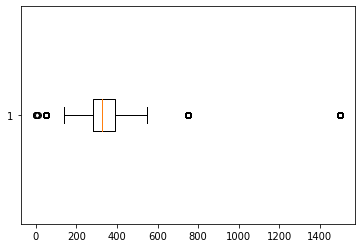

In [130]:
ret = plt.boxplot(all_no_missing['avg_price'],vert=False)

In [131]:
print(ret['whiskers'][0].get_xdata()[1])
print(ret['whiskers'][1].get_xdata()[1])

138.1578947368421
549.0


In [145]:
nooutlier_nomissing = all_no_missing[all_no_missing['avg_price']>=ret['whiskers'][0].get_xdata()[1]]
nooutlier_nomissing = nooutlier_nomissing[nooutlier_nomissing['avg_price']<=ret['whiskers'][1].get_xdata()[1]]
nooutlier_nomissing

,name,city_name,avg_price
50891,Kuroshio Market,Wakayama-ken,327.447288
71141,Tama Cafe,Wakayama-ken,327.447288
96428,Nishikawa Restaurant,Wakayama-ken,327.447288
104527,Ide Shoten,Wakayama-ken,327.447288
197984,Coco Gelato,Wakayama-ken,327.447288
...,...,...,...
108832,Beniya Japanese Sushi Restaurant,Hawaii,327.447288
221588,Lappert's Hawaii,Hawaii,327.447288
227814,Aloha Lalua Cafe,Hawaii,327.447288
243085,Island Vintage Coffee,Hawaii,327.447288




*   ~~ Smooth data (binning) ~~
*   ~~ Reduce Data (Deduplication (remove duplication), sampling (randomly select data) vs PCA (reduce dimensions of data)) ~~
*   Data Integration (combine 2 tables vs copy some columns from another table)



# Data Integration (combine 2 tables vs copy some columns from another table)
or merge the entire tables https://www.kaggle.com/crawford/python-merge-tutorial/#

##merge two tables (.merge())
  //การรวม2ตารางเข้าด้วยกัน

In [133]:
##การรวมกันเราจะใช้คำสั่งmerged 
##ตย.แบบแรกเอาสองตารางมาไว้ด้วยกันเลย
merged_table = search_click_df.merge(w_restaurant_df,how='left',left_on='business_id',right_on='id')
merged_table

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery,numder_of_chains
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True,298839.0,ปูดองอันยอง Eight,1.0,0.0,Bangkok Metropolitan Region,10110,w4rw0g9,0.0,3.836735,12.0,22.0,3.0,0.0,22484.0,1.0,5.0,0.0,Seafood,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.0
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True,171372.0,Yoshinoya,1.0,0.0,Bangkok Metropolitan Region,NaN,w4rteh0,0.0,3.118367,28.0,60.0,43.0,6.0,18373.0,41.0,34.0,37.0,Japanese,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,0.0,3.0,NaN,NaN,NaN,1.0,28.0
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True,16157.0,The Hub Cafe and Eatery,1.0,0.0,Bangkok Metropolitan Region,NaN,w4rw1tu,0.0,4.015184,NaN,348.0,36.0,0.0,27252.0,21.0,13.0,58.0,Cafe,3.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,0.0
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True,89741.0,ซั่งไห่ เสี่ยวหลงเปา,1.0,0.0,Bangkok Metropolitan Region,10900,w4rw8p7,0.0,3.444134,NaN,101.0,21.0,7.0,54847.0,19.0,43.0,32.0,Dim Sum,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,1.0,0.0
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True,189564.0,Yoshinoya,1.0,0.0,Bangkok Metropolitan Region,10110,w4rw0kc,0.0,2.972672,28.0,32.0,69.0,8.0,13851.0,22.0,66.0,26.0,Japanese,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False,278479.0,เสกแจ่วฮ้อน,1.0,0.0,Chaiyaphum,NaN,w6b9cyk,0.0,4.000000,NaN,3.0,2.0,2.0,1599.0,0.0,0.0,0.0,Sukiyaki/Shabu,1.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False,321885.0,ก๋วยเตี๋ยวหมูหน่อกะลา,1.0,0.0,Bangkok Metropolitan Region,11120,w4rrppd,0.0,4.000000,NaN,7.0,2.0,1.0,956.0,1.0,0.0,0.0,Noodles,1.0,NaN,3.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False,221035.0,Laemcharoen Seafood,1.0,0.0,Bangkok Metropolitan Region,12130,w4rx9de,0.0,3.830601,23.0,24.0,11.0,8.0,8977.0,7.0,8.0,4.0,Seafood,3.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False,220572.0,เอี่ยวไถ่ สุกี้โบราณ,1.0,0.0,Bangkok Metropolitan Region,11130,w4rqtcb,0.0,3.766129,12.0,153.0,58.0,12.0,37940.0,78.0,0.0,29.0,Sukiyaki/Shabu,3.0,NaN,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.0


##copy a column from other table (.map())

In [134]:
#เหมือนการเพิ่มคอลัมตารางปกติของแพนด้า
#แมพตารางsearch_clickกับw_restaurantมา แล้วเลือคอลัม
search_click_df['bu_name'] = search_click_df['business_id'].map(w_restaurant_df.set_index('id')['name'])
search_click_df

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,bu_name
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True,ปูดองอันยอง Eight
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True,Yoshinoya
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True,The Hub Cafe and Eatery
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True,ซั่งไห่ เสี่ยวหลงเปา
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True,Yoshinoya
...,...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False,เสกแจ่วฮ้อน
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False,ก๋วยเตี๋ยวหมูหน่อกะลา
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False,Laemcharoen Seafood
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False,เอี่ยวไถ่ สุกี้โบราณ


In [135]:
search_click_df['city'] = search_click_df['business_id'].map(w_restaurant_df.set_index('id')['city_name'])
search_click_df

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,bu_name,city
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True,ปูดองอันยอง Eight,Bangkok Metropolitan Region
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True,Yoshinoya,Bangkok Metropolitan Region
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True,The Hub Cafe and Eatery,Bangkok Metropolitan Region
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True,ซั่งไห่ เสี่ยวหลงเปา,Bangkok Metropolitan Region
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True,Yoshinoya,Bangkok Metropolitan Region
...,...,...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False,เสกแจ่วฮ้อน,Chaiyaphum
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False,ก๋วยเตี๋ยวหมูหน่อกะลา,Bangkok Metropolitan Region
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False,Laemcharoen Seafood,Bangkok Metropolitan Region
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False,เอี่ยวไถ่ สุกี้โบราณ,Bangkok Metropolitan Region


## [PD] groupby()
https://www.kaggle.com/crawford/python-groupby-tutorial#

In [146]:
search_click_df.groupby('business_id').count()

,click_timestamp,search_id,display_position,time_diff_nanos,ads,bu_name,city
business_id,,,,,,,
2.0,4,4,4,4,4,4,4
5.0,2,2,2,2,2,2,2
6.0,6,6,6,6,6,6,6
7.0,3,3,3,3,3,3,3
14.0,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...
340060.0,4,4,4,4,4,4,4
340063.0,1,1,1,1,1,1,1
340067.0,2,2,2,2,2,2,2


In [136]:
search_click_df.groupby('business_id').count().sort_values('click_timestamp')

,click_timestamp,search_id,display_position,time_diff_nanos,ads,bu_name,city
business_id,,,,,,,
122473.0,1,1,1,1,1,1,1
136485.0,1,1,1,1,1,1,1
275120.0,1,1,1,1,1,1,1
136492.0,1,1,1,1,1,1,1
136498.0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
150227.0,1377,1377,1377,1377,1377,1377,1377
273486.0,1417,1417,1417,1417,1417,1417,1417
112509.0,2130,2130,2130,2130,2130,2130,2130


In [137]:
##ตารางที่มีคน.... เยอะที่สุด
w_restaurant_df[w_restaurant_df['id']==182530]

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery,numder_of_chains
124030,182530,หนานหยวน,1,0,Bangkok Metropolitan Region,10400,w4rw22m,0,4.083893,NaN,37.0,20,1,14200,11,0,10,Chinese,3.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


## QUIZ หาจังหวัดที่มีคน click เข้าไปมากที่สุดสามอันดับแรก


In [138]:
search_click_df.groupby('city').count().sort_values('click_timestamp').iloc[-3:,:]

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,bu_name
city,,,,,,,
Chon Buri,51535,51535,51535,51535,51535,51535,51535
Chiang Mai,56775,56775,56775,56775,56775,56775,56775
Bangkok Metropolitan Region,596980,596963,596980,596980,596980,596980,596980


In [139]:
#แบบเรียงจากมากไปน้อย
search_click_df.groupby('city').count().sort_values('click_timestamp',ascending=False).iloc[:3,:]

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,bu_name
city,,,,,,,
Bangkok Metropolitan Region,596980,596963,596980,596980,596980,596980,596980
Chiang Mai,56775,56775,56775,56775,56775,56775,56775
Chon Buri,51535,51535,51535,51535,51535,51535,51535


##เมืองไหนที่มีค่าเฉลี่ยของ 'weighted_average_rating' สูงสุด

In [140]:
w_restaurant_df.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery,numder_of_chains
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,0.0
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,0.0


In [141]:
w_restaurant_df.groupby('city_name').mean().sort_values('weighted_average_rating',ascending=False)

,id,domain_id,closed,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery,numder_of_chains
city_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Khartoum,303589.000000,1.0,0.0,0.0,5.0,NaN,NaN,1.0,0.0,64.0,0.000000,0.0,0.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,0.0
Cairo Governorate,277711.000000,1.0,0.0,0.0,5.0,NaN,NaN,1.0,0.0,169.0,0.000000,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Vaud,161710.500000,1.0,0.0,0.0,5.0,NaN,NaN,1.0,0.5,256.0,0.000000,0.0,2.5,3.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.0
Borno,276020.000000,2.0,0.0,0.0,5.0,NaN,2.0,1.0,0.0,309.0,0.000000,0.0,19.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,0.0
Kepulauan Riau,145430.500000,1.0,0.0,1.0,5.0,NaN,NaN,1.0,0.0,173.0,1.000000,0.0,1.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.5,3.5,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Castilla-La Mancha,210336.333333,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,39.0,0.666667,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Capital Region of Denmark,134835.000000,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,42.0,1.000000,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Région de Kidal,240208.500000,2.0,0.5,0.0,0.0,NaN,NaN,0.0,0.0,51.5,0.000000,0.0,0.0,NaN,NaN,3.0,0.5,1.0,1.0,1.0,NaN,0.5,12.0,NaN,NaN,NaN,NaN,0.0


##เมืองไหนที่มีค่าเฉลี่ยของ 'weighted_average_rating' สูงที่สุด
##แบบน่าเชื่อถือที่สุด (number_of_reviews สูงที่สุด)

In [142]:
sorted_star = w_restaurant_df.groupby('city_name').mean().sort_values('weighted_average_rating',ascending=False)
sorted_star

,id,domain_id,closed,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery,numder_of_chains
city_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Khartoum,303589.000000,1.0,0.0,0.0,5.0,NaN,NaN,1.0,0.0,64.0,0.000000,0.0,0.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,0.0
Cairo Governorate,277711.000000,1.0,0.0,0.0,5.0,NaN,NaN,1.0,0.0,169.0,0.000000,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Vaud,161710.500000,1.0,0.0,0.0,5.0,NaN,NaN,1.0,0.5,256.0,0.000000,0.0,2.5,3.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.0
Borno,276020.000000,2.0,0.0,0.0,5.0,NaN,2.0,1.0,0.0,309.0,0.000000,0.0,19.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,0.0
Kepulauan Riau,145430.500000,1.0,0.0,1.0,5.0,NaN,NaN,1.0,0.0,173.0,1.000000,0.0,1.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.5,3.5,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Castilla-La Mancha,210336.333333,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,39.0,0.666667,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Capital Region of Denmark,134835.000000,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,42.0,1.000000,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Région de Kidal,240208.500000,2.0,0.5,0.0,0.0,NaN,NaN,0.0,0.0,51.5,0.000000,0.0,0.0,NaN,NaN,3.0,0.5,1.0,1.0,1.0,NaN,0.5,12.0,NaN,NaN,NaN,NaN,0.0


In [143]:
sorted_star[sorted_star['number_of_reviews']>=5]

,id,domain_id,closed,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery,numder_of_chains
city_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Maldives,242953.000000,1.000000,0.000000,0.000000,4.642857,NaN,6.000000,5.000000,0.000000,449.000000,5.000000,0.000000,4.000000,5.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,0.000000
Chiang Mai,179078.979643,1.168028,0.017613,0.076771,2.508858,121.751984,35.397381,5.102999,0.758328,2574.461264,3.501149,0.000830,2.786599,1.358664,188.415948,2.061678,0.191589,0.921772,0.903908,0.550442,1924.139535,0.808257,2.644038,0.143113,0.334699,0.067387,0.164958,3.915954
Bangkok Metropolitan Region,179658.982155,1.117261,0.021563,0.044896,2.343438,95.205330,29.484147,5.045314,1.082147,3503.774476,3.549260,0.548644,3.319014,1.544788,392.585472,2.006208,0.326420,0.899092,0.878424,0.564304,1801.302013,0.643051,2.704984,0.350809,0.397129,0.162970,0.915868,10.122689
Hua Hin,180926.866138,1.167576,0.009916,0.031730,2.162976,126.170000,41.427609,5.197819,0.775409,2622.502231,3.410015,0.000992,2.068914,1.766983,250.000000,2.030043,0.334906,0.917044,0.932238,0.705479,1441.428571,0.919540,2.525692,0.526316,0.882716,0.144144,0.409091,6.255330


##Save to use with other applications

In [144]:
search_click_df.to_csv('search_click_extracted_time.csv')